In [1]:
from pyFLUT import ulf
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['mystyle', 'mystyle-nb'])
import numpy as np
from pyFLUT.ulf.ulfRun import UlfRun
colors = [i['color'] for i in plt.rcParams['axes.prop_cycle']]
import shutil

In [10]:
DH = np.linspace(0, 1.5e6, 4)
DH
solver = "/shared_home/vascella/Codes/ulf/build_git2/ulf.x"
print(DH)

[       0.   500000.  1000000.  1500000.]


In [11]:
shutil.copy('flamelet.ulf', 'flamelet_run.ulf')
results = []
for i, DHi in enumerate(DH):
    runner = ulf.UlfRun('flamelet_run.ulf', solver=solver)
    runner.set('DHMAX', DHi)
    runner.set('BASENAME', 'flamelet_res{}_'.format(i))
    print('Run case {} - DHmax {:3.2f}'.format(i, DHi/1e6))
    try:
        res = runner.run()
        results.append(res)
    except:
        print('Solution crashed')

Run case 0 - DHmax
Run case 1 - DHmax
Run case 2 - DHmax
Run case 3 - DHmax
Solution crashed


In [6]:
results

In [104]:
results = [ulf.read_ulf('flamelet_res{}_final.ulf'.format(i)) for i, _ in enumerate(DH)]

In [105]:
linestyles = ['-', '--', ':']
species = ['CO', 'CO2', 'H2', 'H2O', 'C6H6', 'O2']

In [106]:
pv = {'CO': 1, 'CO2': 1}
for res in results:
    res.define_progress_variable(pv)
    res.calc_progress_variable()

(0, 0.4)

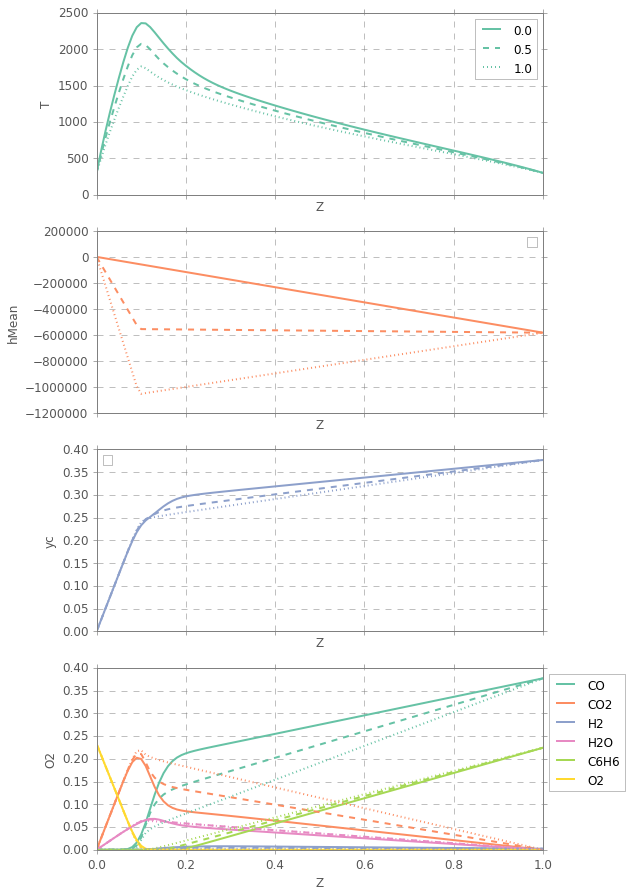

In [107]:
# plot temperature
fig, ax = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(8, 15))
for i, res in enumerate(results):
    res.plotdata('Z', 'T', ax=ax[0], label=DH[i]/1e6, linestyle=linestyles[i], color=colors[0])
    res.plotdata('Z', 'hMean', ax=ax[1], linestyle=linestyles[i], color=colors[1])
    res.plotdata('Z', 'yc', ax=ax[2], linestyle=linestyles[i], color=colors[2])
    for j, sp in enumerate(species):
        res.plotdata('Z', sp, ax=ax[3], linestyle=linestyles[i], color=colors[j])
ax[1].legend([])
ax[2].legend([])
ax[3].legend(species, loc = 'upper left', bbox_to_anchor = (1.0, 1))
ax[3].set_ylim([0, 0.4])

# Compare with standard flamelet

Here we compare the solution of the standard flamelet solver, which solves the temperature equation, and the new solver with prescribed enthalpy, setting the enthalpy to zero.

In [109]:
runner_std = ulf.UlfRun('flameletStd.ulf', solver=solver)
res_std = runner_std.run()

In [110]:
runner_fixH = ulf.UlfRun('flamelet.ulf', solver=solver)
runner_fixH.set('DHMAX', 0.0)
res_fixH = runner_fixH.run()

[-600000 -400000 -200000       0]


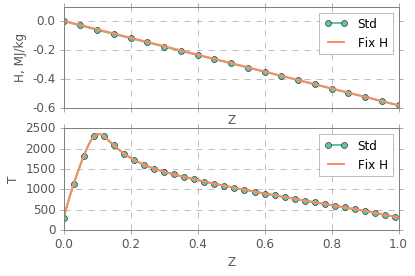

In [139]:
#res_std = ulf.read_ulf('flameletStd_res_final.ulf')
#res_final = ulf.read_ulf('flamelet_res_final.ulf')

fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True)
res_std.plotdata('Z', 'hMean', marker='o', label='Std', ax=ax[0], markevery=5)
res_fixH.plotdata('Z', 'hMean', label='Fix H', ax=ax[0])
h = np.arange(-600000, 100000+1, 200000)
print h
ax[0].set_yticks(h)
ax[0].set_yticklabels(h/1e6)
ax[0].set_ylabel('H, MJ/kg')

res_std.plotdata('Z', 'T', marker='o', label='Std', ax=ax[1], markevery=3)
res_fixH.plotdata('Z', 'T', label='Fix H', ax=ax[1])
#res_final.plotdata('Z', 'hMean', ax=ax, label='Final')
#res.plotdata('Z', 'T')